# Heart Failure Prediction

Age: Between 40 and 95

Anaemia: Binary, does the patient has low red-blood cells and iron levels (1 for True and 0 for False)

Creatinine Phosphokinase: Integer, Level of the CPK enzyme in the blood (mcg/L)

Diabetes: Binary, The sugar level of the patient(1 for True and 0 for False)

Ejection Fraction: Integer, Percentage of blood leaving the heart at each
contraction (percentage)

High Blood Pressure: Binary, The blood pressure level 140/90mmHg or higher (1 for True and 0 for False)

Platelets: Float, Platelets in the blood (kiloplatelets/mL)

Serum Creatinine: Float, Level of serum creatinine in the blood (mg/dL)

Serum Sodium,: Float, Level of serum sodium in the blood (mEq/L)

Sex: Binary, 1 for men, 0 for women

Smoking: Binary, 1 for smokers, 0 or non-smokers

Time: Follow-up period (days) - admission/hospital check-up

DEATH_EVENT: Binary, did the patient die during the follow-period (1 for True and 0 for False)

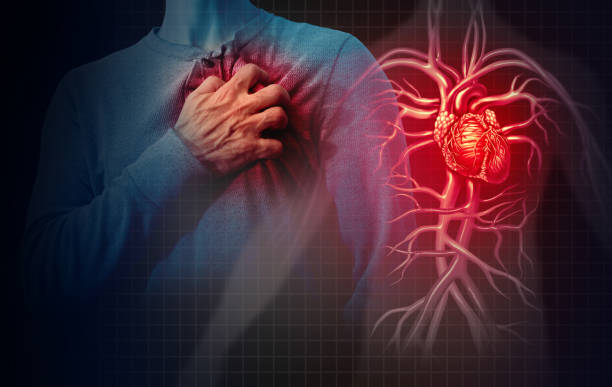

## Import dataset

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [23]:
df.shape

(299, 13)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Checking Outliers for every column

In [6]:
df_subset1 = df.loc[[i for i in range(0,299)],['anaemia','creatinine_phosphokinase','diabetes']]
df_subset1

,anaemia,creatinine_phosphokinase,diabetes
0,0,582,0
1,0,7861,0
2,0,146,0
3,1,111,0
4,1,160,1
...,...,...,...
294,0,61,1
295,0,1820,0
296,0,2060,1
297,0,2413,0


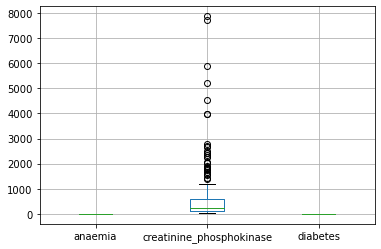

In [7]:
boxplot = df_subset1.boxplot()

In [8]:
df_subset2 = df.loc[[i for i in range(0,299)],['ejection_fraction','high_blood_pressure','platelets']]
df_subset2

,ejection_fraction,high_blood_pressure,platelets
0,20,1,265000.00
1,38,0,263358.03
2,20,0,162000.00
3,20,0,210000.00
4,20,0,327000.00
...,...,...,...
294,38,1,155000.00
295,38,0,270000.00
296,60,0,742000.00
297,38,0,140000.00


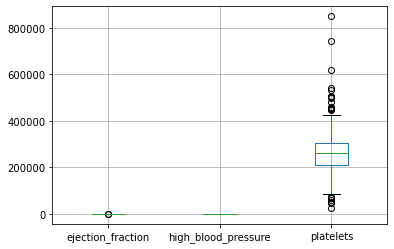

In [9]:
boxplot = df_subset2.boxplot()

In [10]:
df_subset3 = df.loc[[i for i in range(0,299)],['serum_creatinine','serum_sodium','time']]
df_subset3

,serum_creatinine,serum_sodium,time
0,1.9,130,4
1,1.1,136,6
2,1.3,129,7
3,1.9,137,7
4,2.7,116,8
...,...,...,...
294,1.1,143,270
295,1.2,139,271
296,0.8,138,278
297,1.4,140,280


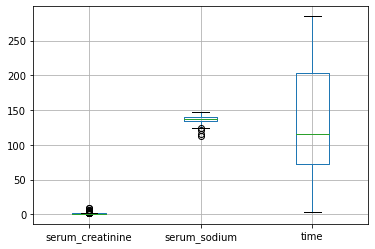

In [11]:
boxplot = df_subset3.boxplot()

## Correlation Between Columns

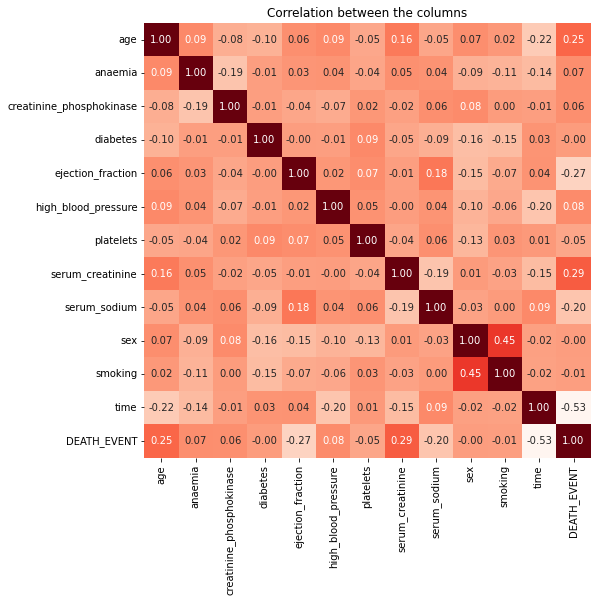

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cbar=False, cmap='Reds', fmt='.2f')
plt.title("Correlation between the columns")
plt.show()

## Building a Simple Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [14]:
y = df['DEATH_EVENT'].copy()
X = df.drop('DEATH_EVENT', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(239, 12) (239,)
(60, 12) (60,)


In [15]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f'the accuracy for the logistic regression is {round(acc, 3)}')

the accuracy for the logistic regression is 0.8


In [16]:
results=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_csv(f"Heart Failure Prediction.csv")

## Model Evaluation

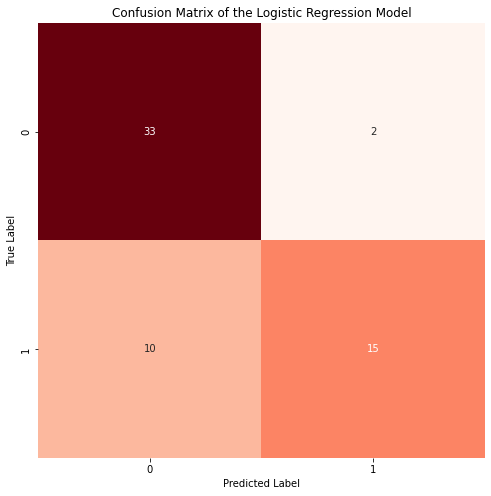

In [17]:
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cbar=None, cmap='Reds', fmt='.0f')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the Logistic Regression Model')
plt.show()

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



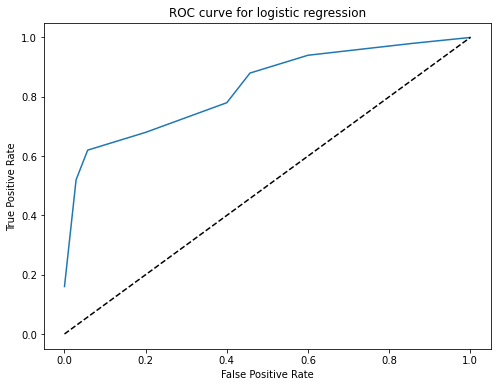

In [19]:
from sklearn.metrics import roc_curve

y_proba = model.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])

plt.figure(figsize=(8,6))
sns.lineplot(x=fpr, y=tpr, ci=None)
sns.lineplot(x=[0,1], y=[0,1], linestyle='--', color='black')
plt.title('ROC curve for logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()